torch.Size([1, 3, 224, 224])
-----


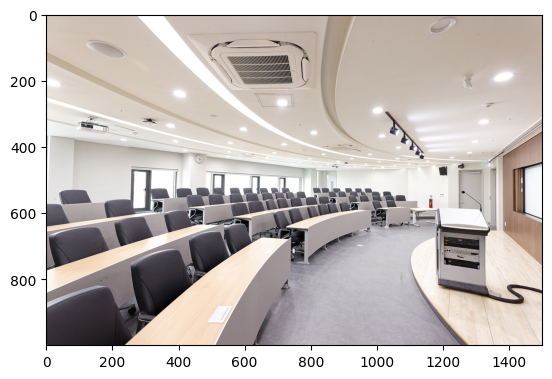

classroom                                                                   (99.52%)
warehouse                                                                   (0.47%)
cafe                                                                        (0.00%)


In [8]:
import json
from PIL import Image
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt

# Create the model (use the same architecture as the trained model)
model = EfficientNet.from_name('efficientnet-b0', num_classes = 3)  # or the appropriate version

# Load your trained weights
checkpoint = torch.load('weights/best_weights_b0_single_10.pth')

# 직접 모델의 state_dict에 로드
model.load_state_dict(checkpoint)

# Preprocess image
tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
##################
img_path = 'infe_images/classroom2.png'
##################
img = tfms(Image.open(img_path)).unsqueeze(0)
print(img.shape)  # torch.Size([1, 3, 224, 224])

# Load ImageNet class names
with open('labels_map.txt') as f:
    labels_map = json.load(f)

num_classes = len(labels_map)
labels_map = [labels_map[str(i)] for i in range(num_classes)]

# Classify
model.eval()
with torch.no_grad():
    outputs = model(img)

# Print predictions
print('-----')
img = Image.open(img_path)
plt.imshow(img)
plt.show()

for idx in torch.topk(outputs, k=3).indices.squeeze(0).tolist():
    if idx < num_classes:
        prob = torch.softmax(outputs, dim=1)[0, idx].item()
        print('{label:<75} ({p:.2f}%)'.format(label=labels_map[idx], p=prob*100))
    else:
        print(f'Class index {idx} out of range for available labels.')


Best Validation Metrics:
Accuracy: 0.9444444444444444
Precision: 0.9537037037037037
Recall: 0.9444444444444444
F1 Score: 0.9445887445887445


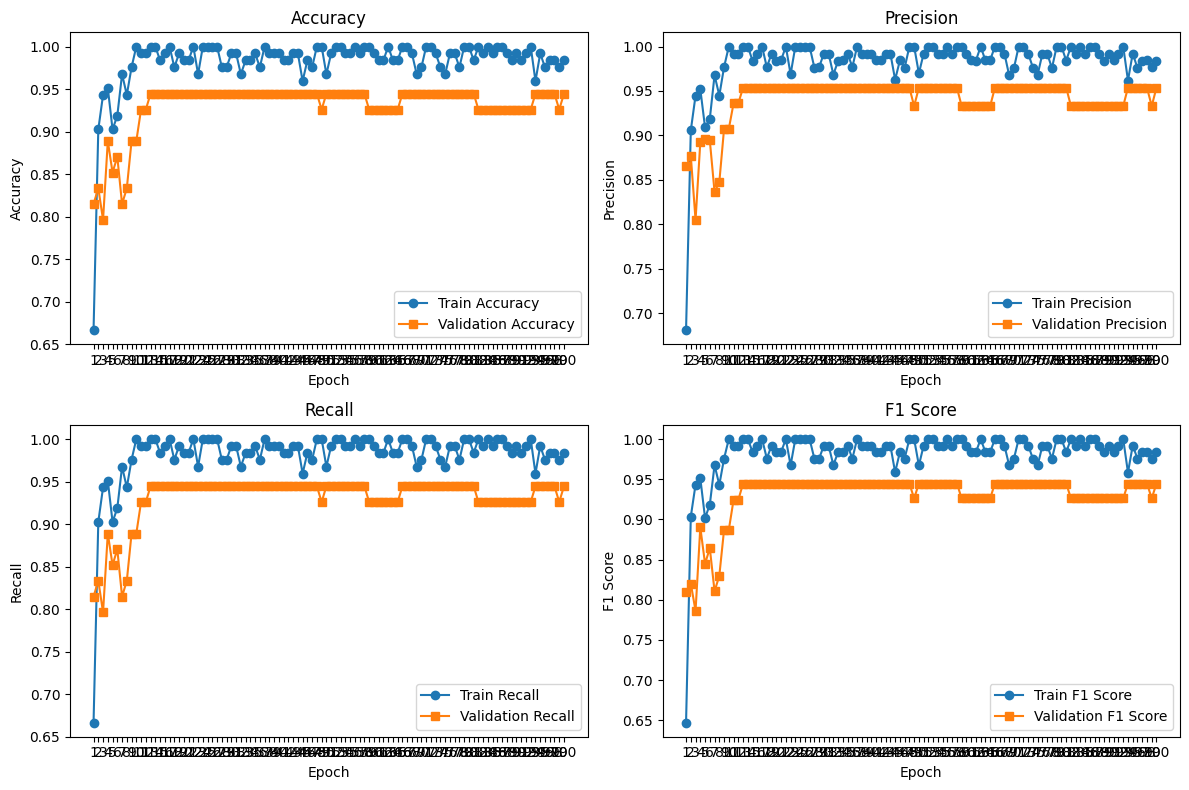

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# metrics.npy 파일에서 데이터 로드
metrics = np.load('metrics/metrics_single_100.npy', allow_pickle=True).item()

# 각 메트릭 데이터 추출
train_acc_list = metrics['train_acc']
train_prec_list = metrics['train_prec']
train_rec_list = metrics['train_rec']
train_f1_list = metrics['train_f1']

val_acc_list = metrics['val_acc']
val_prec_list = metrics['val_prec']
val_rec_list = metrics['val_rec']
val_f1_list = metrics['val_f1']

# 가장 좋은 지표 찾기
best_val_acc_index = np.argmax(val_acc_list)
best_val_acc = val_acc_list[best_val_acc_index]
best_val_prec = val_prec_list[best_val_acc_index]
best_val_rec = val_rec_list[best_val_acc_index]
best_val_f1 = val_f1_list[best_val_acc_index]

# 예시로 가장 좋은 지표 출력
print("Best Validation Metrics:")
print("Accuracy:", best_val_acc)
print("Precision:", best_val_prec)
print("Recall:", best_val_rec)
print("F1 Score:", best_val_f1)


# Epoch 수
epochs = len(train_acc_list)

# Plotting train/validation metrics
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, epochs + 1), train_acc_list, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), val_acc_list, label='Validation Accuracy', marker='s')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs + 1))
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(range(1, epochs + 1), train_prec_list, label='Train Precision', marker='o')
plt.plot(range(1, epochs + 1), val_prec_list, label='Validation Precision', marker='s')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.xticks(range(1, epochs + 1))
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(range(1, epochs + 1), train_rec_list, label='Train Recall', marker='o')
plt.plot(range(1, epochs + 1), val_rec_list, label='Validation Recall', marker='s')
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.xticks(range(1, epochs + 1))
plt.legend()

# F1 Score
plt.subplot(2, 2, 4)
plt.plot(range(1, epochs + 1), train_f1_list, label='Train F1 Score', marker='o')
plt.plot(range(1, epochs + 1), val_f1_list, label='Validation F1 Score', marker='s')
plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.xticks(range(1, epochs + 1))
plt.legend()

plt.tight_layout()
plt.show()